# A Statistical Model of the World Series

The World Series, held annually in late October and early November, serves as the culmination of Major League Baseball's (MLB) playoff structure. It crowns the champion of the United States and Canada by pitting the winner of the American League (AL) against the winner of the National League (NL). The two victors advance to the **World Series, a best-of-seven contest** where the first team to achieve four wins is declared the overall MLB champion.

One of the two teams will be inherently better than the other due to many possible factors (better players, better physical and/or psychological condition, ...), but this doesn't mean it will necessarily win the Series. Many uncontrollable stochastic factors can control the outcome of single games, so the worse team might end up winning more games than the better one purely by "chance". Our main aim will be to assess how effective the structure of the World Series is in revealing who the the better team actually is.

That is, we would like to ask the question:

**What is the probability that the better team wins the World Series?**


Following the work of [Mosteller (1952)](https://math.mit.edu/classes/18.095/2016IAP/lec9/Sports_Mosteller1952_WorldSeries.pdf), we will analyze a simple but effective (?) model to answer this question.

# The Mosteller Model

The basic intuition behind the model is that we can treat single games like flips of an *unfair* coin, that is as *Bernoulli trials*. We assume that one of the two teams has probability of winning $p > 1/2$ (the **better team**) and the other one has probability $(1-p)$ (the **worse team**). Note that **we do not know which one** is the better team, and we couldn't care less. The probability of winning is not attached to any specific team. We just know that, no matter who the two teams are, one of the two will be better than the other and will have probability equal to $p$ of winning single games against the other one.

As if the assumption that baseball games are coin flips wasn't bad enough, we also assume that:

> $p$ does not change throughout a single World Series.

The upside is that now we are able to translate the problem into one we know how to deal with, i.e. a **sum of Bernoulli trials**.

We are almost there, just another (seemingly) ridiculous assumption away from being able to actually use the model. We decide to treat different World Series as samplings of the same underlying process, implying that:

> $p$ does not change even from one World Series to another.

We are now in the same situation we encountered in the analysis of sum of Bernoulli variables. Only this time we have (at most) 7 coin flips per trial, one trial per year the World Series was played and an unknown parameter $p$ that governs the whole process.

The rest of the plan is to use the **Maximum Likelihood** machinery to estimate $p$ and interpret the results.

## Outcome Probabilities and Likelihood

Since we know that the World Series is best-of-seven, the winner of any edition must have won exactly 4 games by definition. The loser result, though, can be anything from 0 to 3 wins. This leaves us with four possible outcomes for the Series: {(4,0), (4,1), (4,2), (4,3)}.

Suppose now we observe the first outcome, that is 4-0. What is the probability of that happening in our model? The only two possibilities are that the better team wins the first four games with probability $p^4$, or that the worse team does with probability $(1-p)^4$. The total probability of seeing an outcome (4,0) will therefore be:
$$
P(0) := P[X_i = (4,0)] = p^4 + (1-p)^4
$$

**NOTE:** If this was a purely Bernoulli trial the probabilities would have been $p^4 (1-p)^3$ and $(1-p)^4 p^3$. This does not apply in this case, since the we are dealing with **truncated** trials (if one team wins the first four games there is no need to play the last three).

As another example, let's calculate the probability of seeing the 4-1 result instead. There are 4 ways in which the winning team (W) can beat the losing team (L):
$$
LWWWW \\
WLWWW \\
WWLWW \\
WWWLW
$$

So the probability of this happening will be $4 p^4 (1-p)$ in case W is the stronger team and $4 (1-p)^4 p$ in case W is the weakest team. Therefore:

$$
P(1) := P[X_i = (4,1)] = 4 p^4 (1-p) + 4 (1-p)^4 p
$$

We can apply the same reasoning to derive the probabilities P(2) of seeing a result of 4-2 and P(3) for 4-3. Provided we rename $q = 1-p$, we obtain the same results reported in the table below un the *Theoretical Proportion* column (from *Mosteller 1952*).

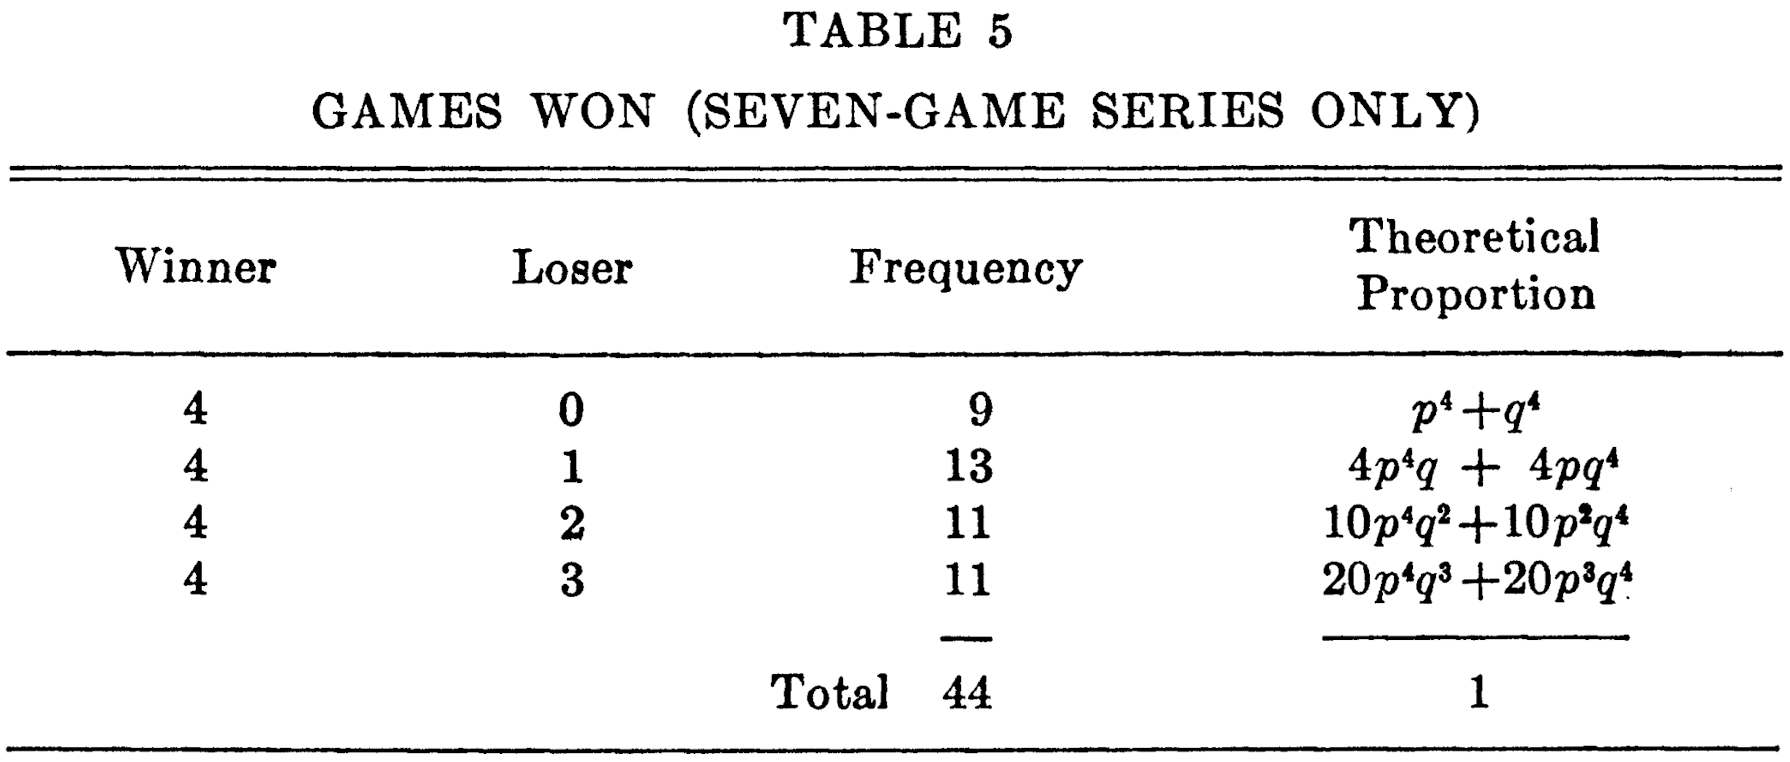

In the same spirit as in the sum of Bernoulli varibles, we can now write the **Likelihood** of seeing a specific number of outocomes:

$$
L(p) = [P(0)]^{n_0} [P(1)]^{n_1} [P(2)]^{n_2} [P(3)]^{n_3}
$$

Also in this case, we can proceed to minimize the negative log-likelihood $ - \log L(p)$.

## Load Data

In order to get meaningful results from our model, we want to estimate $p$ from the historical record of World Series results. A clean version of these data is provided together with this notebook.

In [30]:
# uncomment to clone gh repo easier access to data
DATA_URL = 'https://raw.githubusercontent.com/fmottes/Harvard-AM115-2024/refs/heads/main/Data/
FILE_NAME = 'L02-World_Series_History.csv'

In [31]:
import numpy as np
import scipy
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

In [32]:
#read data into pandas dataframe
with open(DATA_PATH+F'L02-World_Series_History.csv', 'r') as fh:
    ws_history = pd.read_csv(fh, skiprows=2)

ws_history.head()

,Year,AL Winner,WinsAL,WinsNL,NL Winner
0,2023,Texas Rangers,4,1,Arizona Diamondbacks
1,2022,Houston Astros,4,2,Philadelphia Phillies
2,2021,Houston Astros,2,4,Atlanta Braves
3,2020,Tampa Bay Rays,2,4,Los Angeles Dodgers
4,2019,Houston Astros,3,4,Washington Nationals


In [4]:
ws_history.tail()

,Year,AL Winner,WinsAL,WinsNL,NL Winner
116,1907,Detroit Tigers,0,4,Chicago Cubs
117,1906,Chicago White Sox,4,2,Chicago Cubs
118,1905,Philadelphia Athletics,1,4,New York Giants
119,1904,NoWorldSeries,NoWorldSeries,NoWorldSeries,NoWorldSeries
120,1903,Boston Americans,5,3,Pittsburgh Pirates


In [5]:
### CLEAN DATASET

#sort and index by year
ws_history = ws_history.sort_values('Year').set_index('Year')

#convert missing data to NaN and delete records
ws_history = ws_history.replace('NoWorldSeries', np.nan)
ws_history = ws_history.dropna()

#delete years where WS was best-of-nine
ws_history = ws_history.drop([1903,1919,1920,1921])

#convert to correct datatypes
ws_history = ws_history.astype({'AL Winner': str,
                                'WinsAL': 'int32',
                                'WinsNL': 'int32',
                                'NL Winner': str})

ws_history

,AL Winner,WinsAL,WinsNL,NL Winner
Year,,,,
1905,Philadelphia Athletics,1,4,New York Giants
1906,Chicago White Sox,4,2,Chicago Cubs
1907,Detroit Tigers,0,4,Chicago Cubs
1908,Detroit Tigers,1,4,Chicago Cubs
1909,Detroit Tigers,3,4,Pittsburgh Pirates
...,...,...,...,...
2019,Houston Astros,3,4,Washington Nationals
2020,Tampa Bay Rays,2,4,Los Angeles Dodgers
2021,Houston Astros,2,4,Atlanta Braves


## Reproduce Mosteller $p$

In [6]:
# DATA

#limit data to 1952
ws_mosteller = ws_history.loc[1905:1951]

#calculate integer outcomes from series results
loser_wins = (ws_mosteller['WinsAL'] + ws_mosteller['WinsNL'] - 4).abs()

loser_wins.head()

Year
1905    1
1906    2
1907    0
1908    1
1909    3
dtype: int32

In [7]:
### Check we have the same data

n0, n1, n2, n3 = np.bincount(loser_wins.values)

print('Winner\tLoser\tFrequency')
print('-------------------------')
print(f'4\t0\t{n0}')
print(f'4\t1\t{n1}')
print(f'4\t2\t{n2}')
print(f'4\t3\t{n3}')
print('-------------------------')
print(f'Total:\t\t{n0+n1+n2+n3}')

Winner	Loser	Frequency
-------------------------
4	0	9
4	1	13
4	2	11
4	3	11
-------------------------
Total:		44


In [8]:
#Negative log-likelihood from outcome probabilities
def NLL_Mosteller(p, outcomes):

    n0, n1, n2, n3 = np.bincount(outcomes)

    q = 1-p

    P0 = p**4 + q**4
    P1 = 4*(p**4)*q + 4*p*(q**4)
    P2 = 10*(p**4)*(q**2) + 10*(p**2)*(q**4)
    P3 = 20*(p**4)*(q**3) + 20*(p**3)*(q**4)

    log_likelihood = n0*np.log(P0) + n1*np.log(P1) + n2*np.log(P2) + n3*np.log(P3)

    return -log_likelihood

In [9]:
# initial (random) guess for p
p_init = .8

#check initial p makes sense
assert p_init > .5 and p_init < 1.


# minimize with scipy routines
# bounds is used to constrain optimizer to stay in regions where taking log(p) makes sense
epsilon = 1e-5
opt_results = scipy.optimize.minimize(lambda p: NLL_Mosteller(p, loser_wins.values),
                                      p_init,
                                      bounds=[(.5 + epsilon, 1. - epsilon)])

p_numeric = opt_results.x.squeeze()

print(f'Numeric min. p = {p_numeric:.4f}')

Numeric min. p = 0.6556


In [10]:
print(f'MLE reported by Mosteller\t p = 0.6551\n')

print(f'Our numeric estimate\t\t p = {p_numeric:.4f}')

MLE reported by Mosteller	 p = 0.6551

Our numeric estimate		 p = 0.6556


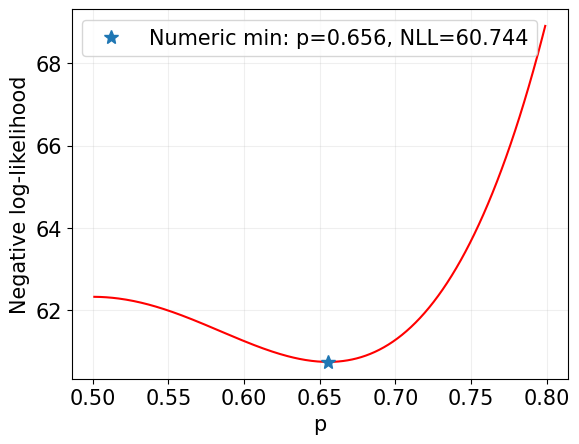

In [11]:
# generate complete NLL curve
# NOTE: limit range to better see the minimum
ps = np.linspace(.501,.799,300)
lls = np.asarray([NLL_Mosteller(pp, loser_wins.values) for pp in ps])
plt.plot(ps, lls, 'r-')

# show estimates for p
plt.plot(p_numeric, NLL_Mosteller(p_numeric, loser_wins.values), '*', markersize=10, label=f'Numeric min: p={p_numeric:.3f}, NLL={NLL_Mosteller(p_numeric, loser_wins.values):.3f}')


plt.xlabel('p')
plt.ylabel('Negative log-likelihood')


plt.grid(alpha=.2)
plt.legend();

## How often does the better team win?

We are now finally in the postion to answer the original question:

**What is the probability that the better team wins the World Series?**

Under the assumptions of our model, we calculated the probability $p$ that the better team wins a single match in the Series. Let's call $S(p,n)$ the probability that the better team wins a best-of-$n$ series. In the case of the World series we have:
$$
S(p,7) = p^4 + 4 p^4 (1-p) + 10 p^4 (1-p)^2 + 20 p^4 (1-p)^3
$$

We can plug our estimate $p \approx 0.65$ into this expression (see code below), finding that $S(0.65, 7) \approx 0.80$.

We conclude that in our model the better team has probability of winning the World Series of approximately 80%.

In [12]:
p = .65

In [13]:
S7 = lambda p: p**4 + 4*(p**4)*(1-p) + 10*(p**4)*(1-p)**2 + 20*(p**4)*(1-p)**3

print(f'S(0.65, 7) = {S7(p):.4}')

S(0.65, 7) = 0.8002


### World Series efficiency with varying $p$ and $n$

We can intuitively expect that the higher the probability of winning single matches, the more easy it will be for the better team to be the Series. In the same way, the longer the series the more differences in winning probability will be amplified.

Below we explore these considerations quantitatively, by considering what happens if we vary $p$ and $n$ in the expression for $S(p,n)$.

In [14]:
# define expressions for S(p,3) and S(p,5)
S3 = lambda p: p**2 + 2*(p**2)*(1-p)
S5 = lambda p: p**3 + 3*(p**3)*(1-p) + 6*(p**3)*(1-p)**2

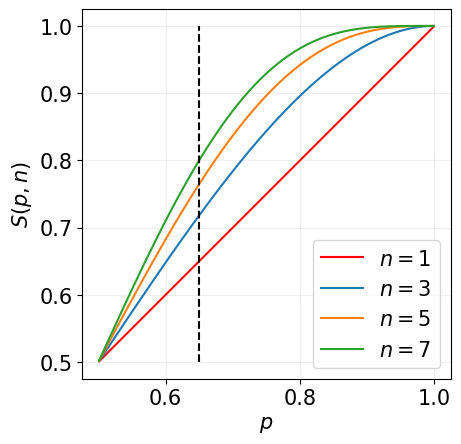

In [15]:
ps = np.linspace(.501,.999,300)

plt.plot(ps, ps, 'r', label='$n = 1$')
plt.plot(ps, S3(ps), label='$n = 3$')
plt.plot(ps, S5(ps), label='$n = 5$')
plt.plot(ps, S7(ps), label='$n = 7$')

#plot vertical line at p
plt.plot([p,p], [.5, 1.], 'k--')

plt.xlabel('$p$')
plt.ylabel('$S(p,n)$')


plt.grid(alpha=.2)

#constrain to same scale on x and y axes (square plot)
plt.gca().set_aspect('equal')

plt.legend(loc='lower right');

# (Stub) Mosteller and Beyond

Is Mosteller's model still a reasonable approximation?

In order to answer this question we can use the same data we loaded in the section above. The only difference is that, instead of limiting our data to 1952, we can use the full extent of our dataset. Do we get a different value for $p$?

- We can also add one (or some) year at a time to our data and keep track of how the $p$ estimate changes (make a plot that shows this). Is the estimate stable in time?

- Suppose you want to compare two different fits for $p$ up to two different cutoffs. Would it be fair to compare the log-likelihood of the two to decide on the better fit? Would the different lengths of the time series be a problem? Why? Can you think of a simple modification of the log-likelihood that fixes the main issue?

In [16]:
# USE ALL DATA

#calculate integer outcomes from series results
loser_wins_all = (ws_history['WinsAL'] + ws_history['WinsNL'] - 4).abs()

loser_wins_all.head()

Year
1905    1
1906    2
1907    0
1908    1
1909    3
dtype: int32

In [17]:
### Check data

n0, n1, n2, n3 = np.bincount(loser_wins_all.values)

print('--- ENTIRE DATASET ---\n')

print('Winner\tLoser\tFrequency')
print('-------------------------')
print(f'4\t0\t{n0}')
print(f'4\t1\t{n1}')
print(f'4\t2\t{n2}')
print(f'4\t3\t{n3}')
print('-------------------------')
print(f'Total:\t\t{n0+n1+n2+n3}')

--- ENTIRE DATASET ---

Winner	Loser	Frequency
-------------------------
4	0	21
4	1	27
4	2	27
4	3	40
-------------------------
Total:		115


In [18]:
p_year = []
nll_year = []

for year in loser_wins_all.index.unique()[20:]:

    ws_year  = ws_history.loc[1905:year]

    # ... estimate p with ws_year and store the value
    # store also the NLL value!


# Predicting WS winners with Logistic Regression

Logistic Regression is a statistical method used for **binary classification problems**, where the outcome/dependent variable is categorical and has **two** possible classes (usually 0 and 1). When predicting the probability of an event, like predicting whether one team will win a world series, Logistic Regression estimates the probability that the outcome belongs to a particular class.

#### Model Representation
The logistic function is used to transform a given linear combination of relevant features into a probability between 0 and 1 of the event happening. The logistic function is:

$$\sigma(z)=\frac{1}{1+e^{-z}},$$

where $z=β_0+β_1x_1+β_2x_2+…+β_nx_n$ and the $β_k, k=1,...,n$ are the model parameters.

#### Model Training
Our loss function will be a negative log-likelihood, which measures the difference between the predicted probabilities and the actual outcomes. During training, the model adjusts the $β_k$ parameters to **maximize** the likelihood of the observed outcomes given the input features.

#### Prediction:

The trained model can be used to predict the probability that one specific team will win a world series. If it calculates this probability to be greater than a given threshold (usually we choose 0.5), the event is predicted to belong to class 1; otherwise, it is predicted to belong to class 0.

#### Evaluation

We can then evaluate model performance with the usual metrics: accuracy, precision, recall, or AUC (area under the ROC (Receiver Operating Characteristic) curve.

#### Adding features to Mosteller's model

In our World Series case, we can use logistic regression to include and leverage additional features and information to improve our model and hopefully increase the accuracy of our predictions. We can then go beyond Mosteller's model by incorporating relevant features (e.g., batting average, run differentials, winning streaks) and training the model on these. We can also gain a better understanding of the features contributing to the outcomes by analyzing the values of $β_k$.

Let's implement these ideas using [feature data](https://www.openintro.org/data/index.php?data=mlb_teams) for the World Series.

In [19]:
# imports
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# read data into pandas dataframe
with open(DATA_PATH+'L02-mlb_teams.csv', 'r') as fh:
    feature_data = pd.read_csv(fh)

print('number of rows:', len(feature_data))
feature_data.head()

number of rows: 2784


,year,league_id,division_id,rank,games_played,home_games,wins,losses,division_winner,wild_card_winner,...,hits_allowed,homeruns_allowed,walks_allowed,strikeouts_by_pitchers,errors,double_plays,fielding_percentage,team_name,ball_park,home_attendance
0,1876,NL,NaN,4,70,NaN,39,31,NaN,NaN,...,732,7,104,77,442,42,0.860,Boston Red Caps,South End Grounds I,NaN
1,1876,NL,NaN,1,66,NaN,52,14,NaN,NaN,...,608,6,29,51,282,33,0.899,Chicago White Stockings,23rd Street Grounds,NaN
2,1876,NL,NaN,8,65,NaN,9,56,NaN,NaN,...,850,9,34,60,469,45,0.841,Cincinnati Reds,Avenue Grounds,NaN
3,1876,NL,NaN,2,69,NaN,47,21,NaN,NaN,...,570,2,27,114,337,27,0.888,Hartford Dark Blues,Hartford Ball Club Grounds,NaN
4,1876,NL,NaN,5,69,NaN,30,36,NaN,NaN,...,605,3,38,125,397,44,0.875,Louisville Grays,Louisville Baseball Park,NaN


In [21]:
feature_data

,year,league_id,division_id,rank,games_played,home_games,wins,losses,division_winner,wild_card_winner,...,hits_allowed,homeruns_allowed,walks_allowed,strikeouts_by_pitchers,errors,double_plays,fielding_percentage,team_name,ball_park,home_attendance
0,1876,NL,NaN,4,70,NaN,39,31,NaN,NaN,...,732,7,104,77,442,42,0.860,Boston Red Caps,South End Grounds I,NaN
1,1876,NL,NaN,1,66,NaN,52,14,NaN,NaN,...,608,6,29,51,282,33,0.899,Chicago White Stockings,23rd Street Grounds,NaN
2,1876,NL,NaN,8,65,NaN,9,56,NaN,NaN,...,850,9,34,60,469,45,0.841,Cincinnati Reds,Avenue Grounds,NaN
3,1876,NL,NaN,2,69,NaN,47,21,NaN,NaN,...,570,2,27,114,337,27,0.888,Hartford Dark Blues,Hartford Ball Club Grounds,NaN
4,1876,NL,NaN,5,69,NaN,30,36,NaN,NaN,...,605,3,38,125,397,44,0.875,Louisville Grays,Louisville Baseball Park,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,2020,NL,C,3,58,27.0,30,28,N,Y,...,376,69,204,464,33,46,0.983,St. Louis Cardinals,Busch Stadium III,0.0
2780,2020,AL,E,1,60,29.0,40,20,Y,N,...,475,70,168,552,33,52,0.985,Tampa Bay Rays,Tropicana Field,0.0
2781,2020,AL,W,5,60,30.0,22,38,N,N,...,479,81,236,489,40,40,0.981,Texas Rangers,Globe Life Field,0.0
2782,2020,AL,E,3,60,26.0,32,28,N,Y,...,517,81,250,519,38,47,0.982,Toronto Blue Jays,Sahlen Field,0.0


In [22]:
# Define the dependent variable and features
target_var = 'world_series_winner'
features = ['runs_scored',
            'at_bats',
            'hits',
            'doubles',
            'triples',
            'homeruns',
            'walks',
            'strikeouts_by_batters',
            'stolen_bases',
            'caught_stealing',
            'batters_hit_by_pitch',
            'sacrifice_flies',
            'opponents_runs_scored',
            'earned_runs_allowed',
            'earned_run_average',
            'complete_games',
            'shutouts',
            'saves',
            'outs_pitches',
            'hits_allowed',
            'homeruns_allowed',
            'walks_allowed',
            'strikeouts_by_pitchers',
            'errors']

# convert target col to binary and drop NaNs
feature_data[target_var] = feature_data[target_var].map({'Y': 1, 'N': 0})
feature_data = feature_data.dropna(subset=features + [target_var])
print('number of rows after dropping NaNs:', len(feature_data))

# Select relevant data
X = feature_data[features]
y = feature_data[target_var]

number of rows after dropping NaNs: 1386


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
## (optional preprocessing but usually done for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Train sklearn's logistic Rrgression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Use this to make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [25]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.95

Confusion Matrix:
[[264   0]
 [ 14   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       264
         1.0       0.00      0.00      0.00        14

    accuracy                           0.95       278
   macro avg       0.47      0.50      0.49       278
weighted avg       0.90      0.95      0.93       278



/nix/store/gqiiy61s57fxw1y4kz4ihv07gn872yvm-python3-3.12.11-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/nix/store/gqiiy61s57fxw1y4kz4ihv07gn872yvm-python3-3.12.11-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/nix/store/gqiiy61s57fxw1y4kz4ihv07gn872yvm-python3-3.12.11-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

<Axes: ylabel='Feature'>

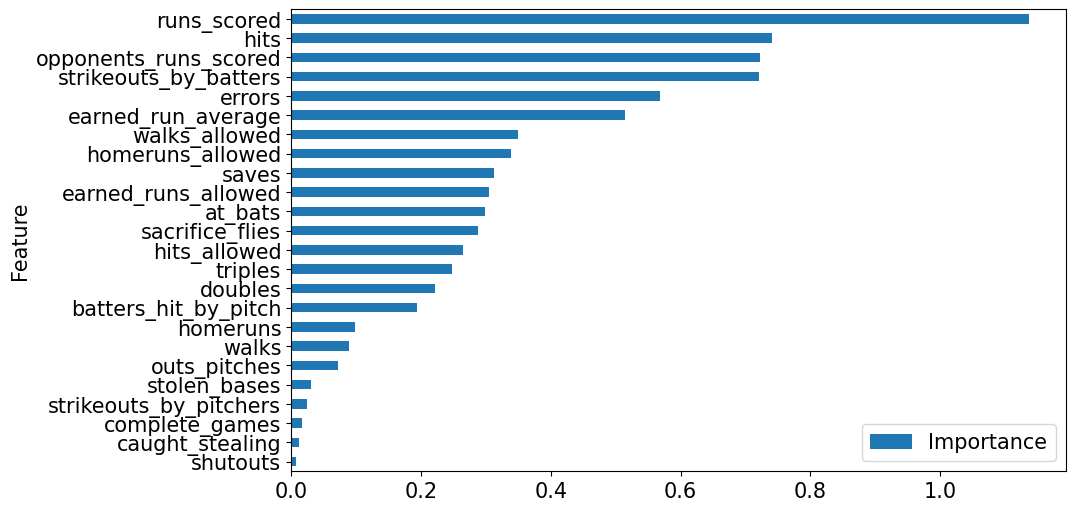

In [26]:
# Examine feature importance
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))